<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [186]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [187]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [188]:
data = pd.read_csv('food_truck_data.txt')
data = data.drop(data[data.Profit == 17.5920].index)
data.head()

,Population,Profit
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860


In [189]:
data.info()
X_train, X_test, y_train, y_test = train_test_split(data.Population, data.Profit, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 1 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  96 non-null     float64
 1   Profit      96 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


### Task 3: Visualize the Data
---

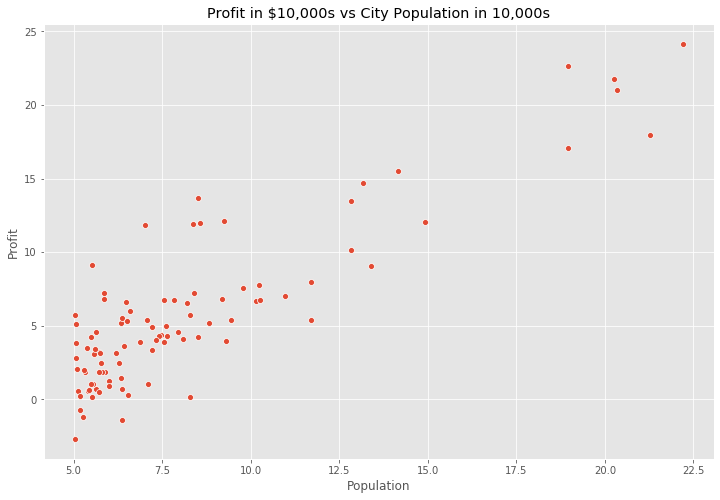

In [190]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10,000s vs City Population in 10,000s');

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [191]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1/(2*m) * np.sum(error)

In [192]:
m = X_train.size
X = np.append(np.ones((m,1)), X_train.values.reshape(m,1), axis=1)
y = y_train.values.reshape(m,1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

31.833870212212684

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [193]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred-y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [194]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {} * x1". format(str(round(theta[0, 0], 2)),
                                 str(round(theta[1, 0], 2))
                                ))

h(x) = -4.33 + 1.21 * x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [195]:
from mpl_toolkits.mplot3d import Axes3D

In [196]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

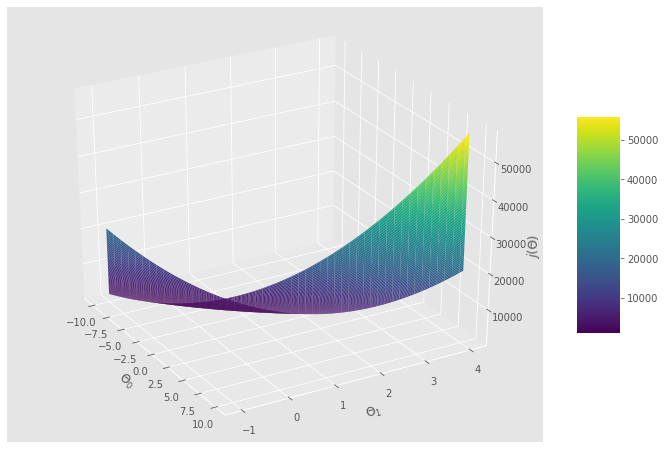

In [197]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink = 0.5, aspect=5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_zlabel('$j(\Theta)$')
ax.view_init(30, 330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

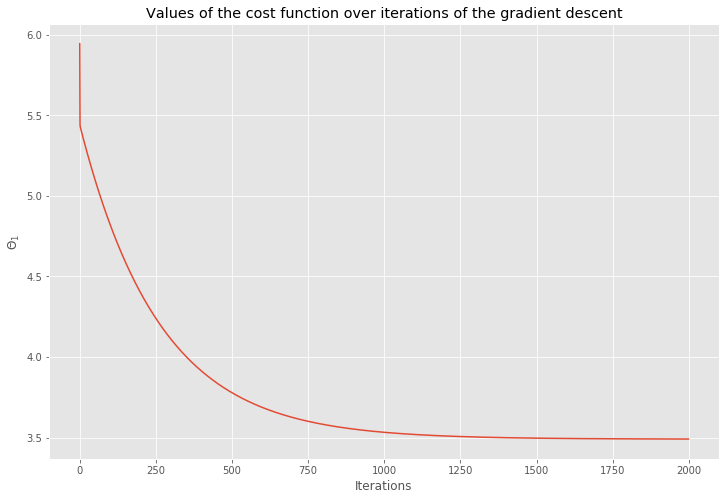

In [198]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$\Theta_1$')
plt.title('Values of the cost function over iterations of the gradient descent')
plt.show()

### Task 8: Training Data with Linear Regression Fit
---

In [199]:
theta.shape

(2, 1)

In [200]:
theta

array([[-4.33295542],
       [ 1.20850052]])

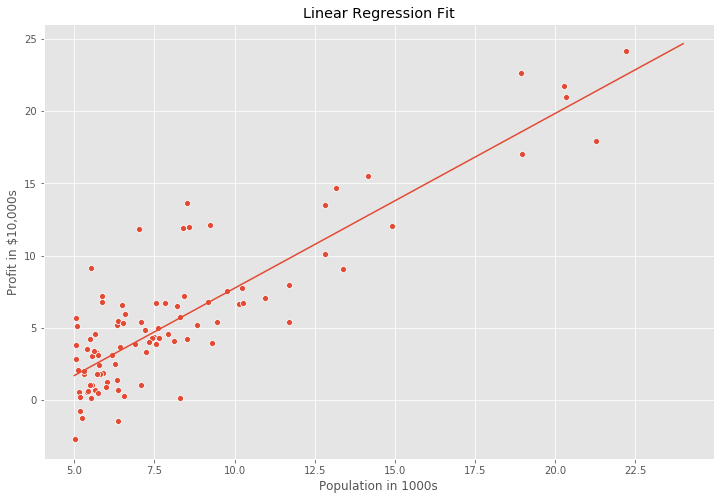

In [201]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 1000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit');

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [202]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [203]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print('For a population of 40,000 people the model predicts a profit of $' + str(round(y_pred_1, 0)))

For a population of 40,000 people the model predicts a profit of $5010.0


In [204]:
y_pred_2 = predict(np.array([1, 8.3]),theta) * 10000
print('For a population of 83,000 people the model predicts a profit of $' + str(round(y_pred_2, 0)))

For a population of 83,000 people the model predicts a profit of $56976.0


In [205]:
m = X_test.size
X_test_1 = X_test.copy()
X_test = np.append(np.ones((m,1)), X_test.values.reshape(m,1), axis=1)
y_test = y_test.values.reshape(m,1)

In [206]:
y_pred = X_test.dot(theta)
y_pred

array([ 1.93722868,  8.08317892,  1.74205585, 11.85370054,  5.5901632 ,
        2.59078576,  7.91640585,  2.64456403,  2.34727291, 12.78424594,
        4.39024303,  3.63033791,  4.21211006,  5.79778359,  6.84349909,
        8.90858478,  5.82860035,  3.31213972,  3.32023667,  6.76132105,
        3.98454941,  2.31307234,  3.35963379, 20.24915365,  1.78133211,
        2.5684285 ,  2.20128604,  2.59658656,  1.79438392])

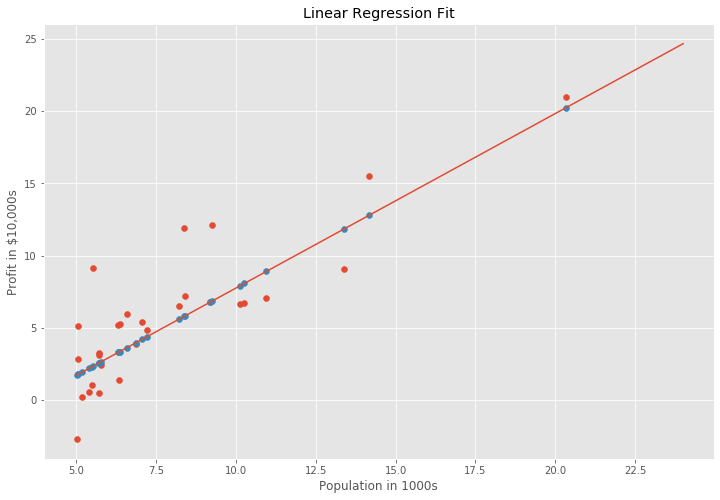

In [207]:
theta = np.squeeze(theta)
plt.scatter(X_test_1, y_test)
plt.scatter(X_test_1, y_pred)
x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 1000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit');

In [208]:
r2_score(y_test, y_pred)

0.7033356045623453

In [209]:
mean_squared_error(y_test, y_pred)

6.864511311031595

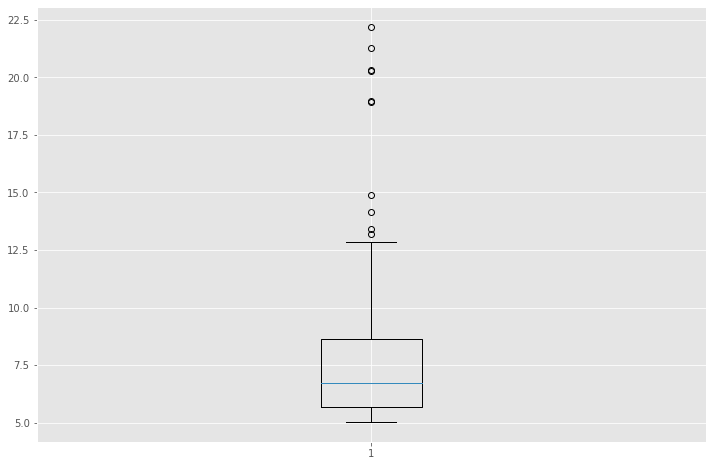

In [210]:
plt.boxplot(data['Population']);